In [57]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Verificar o tamanho do dataset
df.shape

(545, 13)

In [4]:
#Verificar informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [50]:
# Criar um dataframe com dados incorretos
missssing_df = pd.DataFrame({
    'isnull': df.isnull().sum(), # verifica se existem valores nulos
    'isna': df.isna().sum(), # verifica se existem valores ausentes
    'duplicated': df[df.duplicated()].sum() # Verifica se existem linhas duplicadas
})
# Exibir o resultado
display(missssing_df)

,isnull,isna,duplicated
price,0,0,0
area,0,0,0
bedrooms,0,0,0
bathrooms,0,0,0
stories,0,0,0
mainroad,0,0,0
guestroom,0,0,0
basement,0,0,0
hotwaterheating,0,0,0
airconditioning,0,0,0


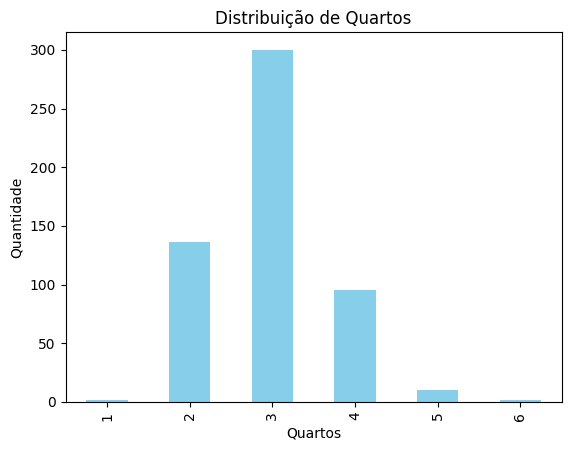

In [23]:
# Criar um gráfico de barras com a contagem de casas por número de quartos
df['bedrooms'].value_counts(sort=False,).sort_index().plot(kind='bar', color='skyblue')

plt.title('Distribuição de Quartos')
plt.xlabel('Quartos')
plt.ylabel('Quantidade')
plt.show()

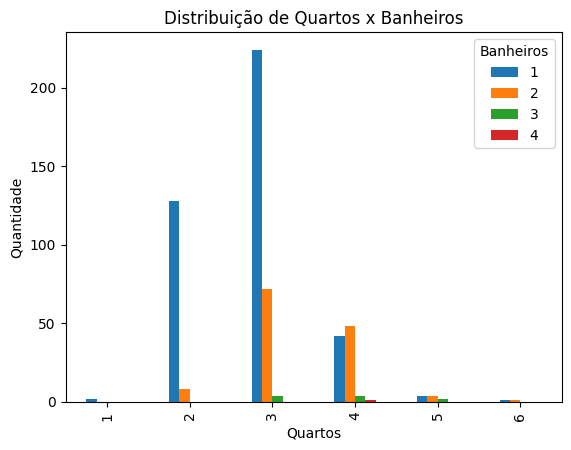

In [14]:
# Criar uma tabela cruzada entre o número de quartos ('bedrooms') e banheiros ('bathrooms')
pd.crosstab(df['bedrooms'], df['bathrooms']).plot(kind='bar')# Gera um gráfico de barras com essa distribuição

plt.title('Distribuição de Quartos x Banheiros')
plt.legend(title='Banheiros')
plt.xlabel('Quartos')
plt.ylabel('Quantidade')
plt.show()


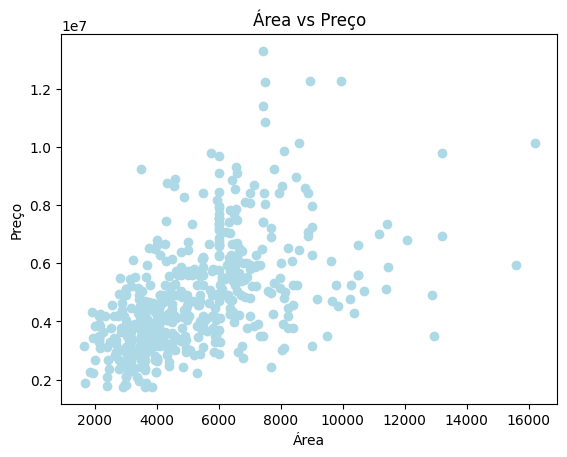

In [25]:
# Criar um gráfico de dispersão (scatter plot) com a área da casa no eixo X e o preço no eixo Y
# Cada ponto representa uma casa
plt.scatter(df['area'],
            df['price'],
            color='lightblue')

plt.xlabel('Área')
plt.ylabel('Preço')
plt.title('Área vs Preço')
plt.show()

In [53]:
# Cálcular o primeiro e terceiro quartis da variável 'price'
Q1 = df['price'].quantile(0.25)   # Primeiro quartil (25% dos dados abaixo)
Q3 = df['price'].quantile(0.75)   # Terceiro quartil (75% dos dados abaixo)

# Cálculo do intervalo interquartil (IQR)
IQR = Q3 - Q1                     # IQR = Q3 - Q1

# Filtra o DataFrame para remover os outliers de 'price'
# Mantém apenas os valores dentro do intervalo [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

# Repete o mesmo processo para a variável 'area'
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

# Remove os outliers da coluna 'area' com base no IQR
df = df[(df['area'] >= Q1 - 1.5 * IQR) & (df['area'] <= Q3 + 1.5 * IQR)]

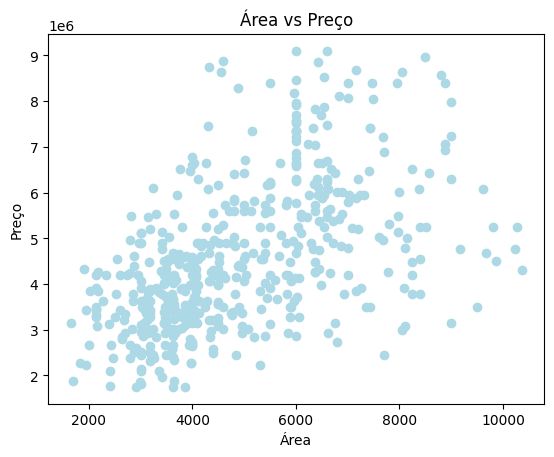

In [28]:
# Criar outro gráfico de dispersão, mas dessa vez sem os outlines
plt.scatter(df['area'],
            df['price'],
            color='lightblue')

plt.xlabel('Área')
plt.ylabel('Preço')
plt.title('Área vs Preço')
plt.show()

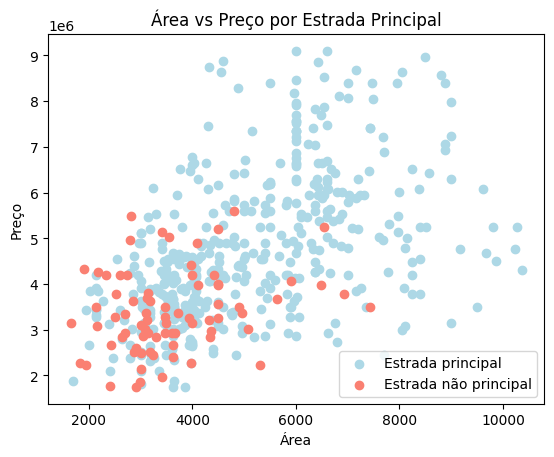

In [39]:
# Filtrar o DataFrame para obter apenas as casas localizadas em uma estrada principal
mainroad = df[df['mainroad'] == 'yes']

# Filtrar o DataFrame para obter apenas as casas NÃO localizadas em uma estrada principal
non_mainroad = df[df['mainroad'] == 'no']

# Criar um gráfico de dispersão para as casas localizadas em estrada principal
plt.scatter(mainroad['area'], mainroad['price'],
            color='lightblue',
            label='Estrada principal')

# Criar um gráfico de dispersão para as casas localizadas fora da estrada principal
plt.scatter(non_mainroad['area'], non_mainroad['price'],
            color='salmon',
            label='Estrada não principal')

# Rótulos e título
plt.xlabel('Área')
plt.ylabel('Preço')
plt.title('Área vs Preço por Estrada Principal')
plt.legend()
plt.show()

In [ ]:
#Transformando preço em milhões para melhor legibilidade
df['price_millions'] = df['price'] / 1e6
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_millions
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,9.100
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished,9.100
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished,8.960
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished,8.890
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished,8.855


## Data Transformation
Transformar variáveis categóricas em numéricas é necessário para que modelos de machine learning possam trabalhar com os dados, já que esses modelos não conseguem interpretar texto diretamente.

In [58]:
# Definir uma lista com os nomes das colunas que possuem variáveis binárias (valores "yes" ou "no")
binary_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

# Para cada uma dessas colunas, aplica uma transformação:
# Substitui "yes" por 1 e "no" por 0, convertendo os valores de texto em valores numéricos binários
df[binary_cols] = df[binary_cols].apply(lambda col: col.map({"yes": 1, "no": 0}))

# Criar um dicionário para mapear os valores categóricos de 'furnishingstatus' para valores numéricos
# 'furnished' será representado por 2, 'semi-furnished' por 1, e 'unfurnished' por 0
maping = {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}
df['furnishingstatus'] = df['furnishingstatus'].map(maping)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


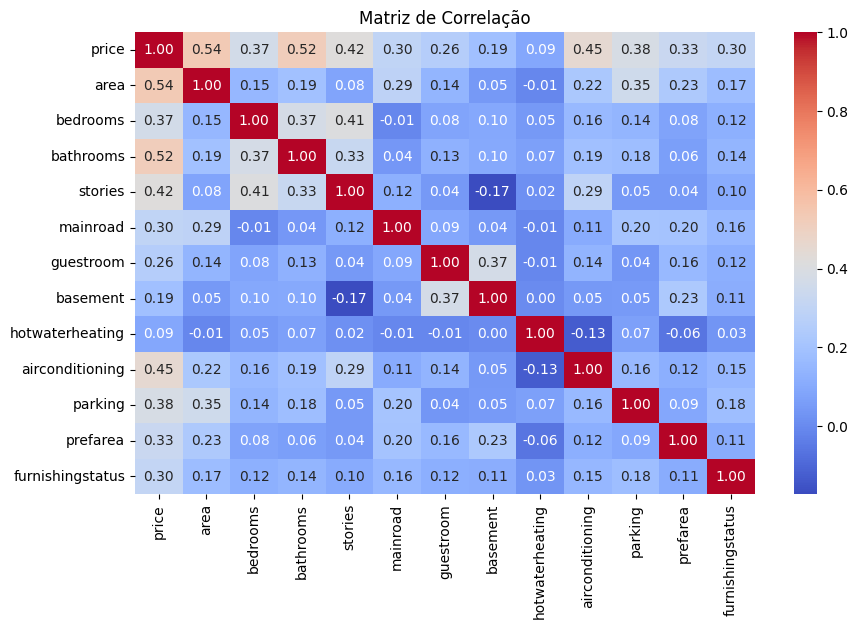

In [60]:
# Calcula a matriz de correlação entre todas as variáveis numéricas do DataFrame
# A correlação indica o grau de associação entre pares de variáveis (varia de -1 a 1)
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
# Cria o mapa de calor (heatmap) da matriz de correlação
# - annot=True: exibe os valores numéricos dentro dos quadrados
# - cmap="coolwarm": define a paleta de cores (azul para correlação negativa, vermelho para positiva)
# - fmt=".2f": formata os valores numéricos com 2 casas decimais
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
# X = todas as colunas, exceto 'price' e 'price_millions'
X = df.drop(columns=["price", "price_millions"])

# y = coluna alvo
y = df["price_millions"]

In [61]:
# Calcula a matriz de correlação
correlation_matrix = df.corr()

# Seleciona apenas a correlação das variáveis com a coluna 'price', ordenada pela força da correlação
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Exibe a correlação com 'price'
print(price_correlation)

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
Name: price, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Criar e treinar o modelo
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
# Previsões
y_pred = ln_model.predict(X_test)

# Avaliação
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Linear Regression Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Linear Regression Metrics:
MAE: 0.74
MSE: 0.98
RMSE: 0.99
R²: 0.67


In [ ]:
# Isso mostra quanto cada variável impacta o preço:
coeficientes = pd.DataFrame({
    "Variável": X.columns,
    "Coeficiente": ln_model.coef_
}).sort_values(by="Coeficiente", ascending=False)

print(coeficientes)

            Variável  Coeficiente
8    airconditioning     0.856377
7    hotwaterheating     0.715671
2          bathrooms     0.708587
10          prefarea     0.504921
3            stories     0.457939
5          guestroom     0.409042
4           mainroad     0.383892
6           basement     0.321023
9            parking     0.220720
11  furnishingstatus     0.143432
1           bedrooms     0.105671
0               area     0.000247


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Treinar o modelo de árvore de decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Fazer previsões
y_pred_tree = tree_model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred_tree)
mse = mean_squared_error(y_test, y_pred_tree)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Decision Tree:
MAE: 1.02
MSE: 1.82
RMSE: 1.35
R²: 0.38


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Avaliação
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Random Forest:
MAE: 0.76
MSE: 1.06
RMSE: 1.03
R²: 0.64


In [ ]:
from sklearn.model_selection import GridSearchCV
# Grade de parâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
# Modelo base
rf = RandomForestRegressor(random_state=42)

# GridSearch com validação cruzada
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=1)

# Ajustar o modelo com os dados de treino
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf = grid_search.best_estimator_

# Previsões
y_pred_rf = best_rf.predict(X_test)

# Avaliação
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Melhores hiperparâmetros:", grid_search.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Melhores hiperparâmetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MAE: 0.75
MSE: 0.98
RMSE: 0.99
R²: 0.67


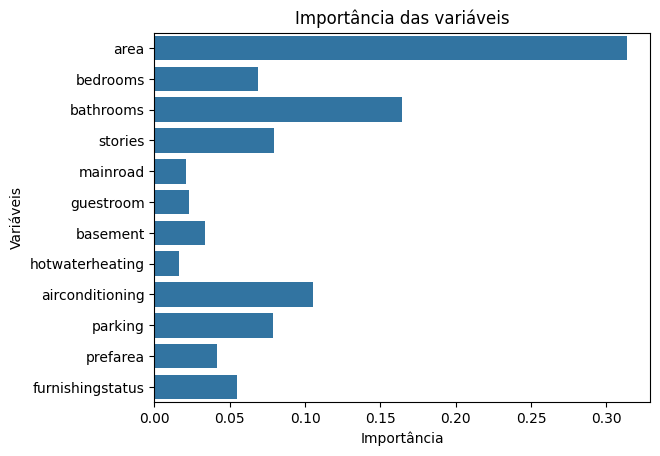

In [ ]:
#Visualizar importância das variáveis (Random Forest faz isso bem!):
importances = best_rf.feature_importances_
features = X_train.columns

sns.barplot(x=importances, y=features)
plt.title("Importância das variáveis")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.show()

In [ ]:
import joblib

# Salvar o melhor modelo Random Forest treinado
joblib.dump(best_rf, 'random_forest_best_model.joblib')

['random_forest_best_model.joblib']

In [ ]:
# Exemplo: um novo imóvel para prever
dados_novos = pd.DataFrame([{
    'area': 3000,
    'bedrooms': 3,
    'bathrooms': 2,
    'stories': 2,
    'mainroad': 1,          # Sim
    'guestroom': 0,         # Não
    'basement': 1,          # Sim
    'hotwaterheating': 0,   # Não
    'airconditioning': 1,   # Sim
    'parking': 2,
    'prefarea': 1,          # Sim
    'furnishingstatus': 2   # Fully Furnished → codificado como 2
}])

In [ ]:
# Previsão
preco_previsto = best_rf.predict(dados_novos)

print(f"Preço previsto: {preco_previsto[0]:.2f}")

Preço previsto: 5.37
